# Visualization of GD

### Most of the codes are based on Mike's codes in Lecture 2 and 6

In [10]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import feather

### Generate data

In [50]:
def gen_outlier_data(n=40,Noutliers=3):
    # generate random data
    x = np.random.randn(n)+10
    y = 11*x - 1
    # add random outliers
    y[:Noutliers] = -100*(x[:Noutliers]+np.random.randn(Noutliers)+10)

    X = x[:,None] # reshape for sklearn

    return X,y

X,y = gen_outlier_data()

x = X.flatten()

### Visualize data

[158.70334499]
-1664.2675825061144


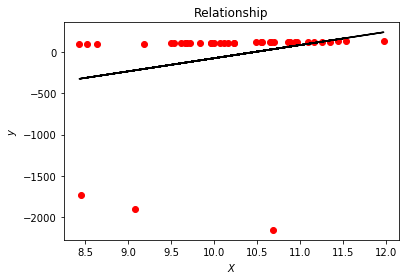

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

plt.plot(x, y, "ro")
plt.plot(x, lr.coef_*x+lr.intercept_,'k')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.title('Relationship')
plt.show()

### See the loss function in parameter space

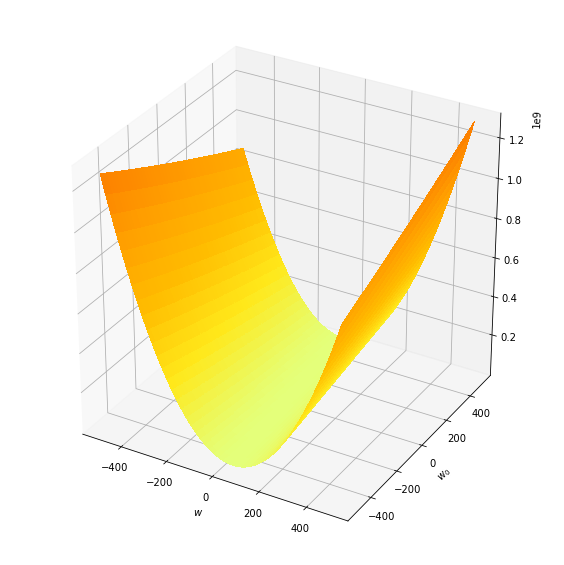

In [52]:
def plot_loss3D(loss_fun, X, y): # reading/understanding this plotting code is optional
    m = 100
    w_lin = np.linspace(-500.0, 500.0, m)
    b_lin = np.linspace(-500.0, 500.0, m)
    w_grid, b_grid = np.meshgrid(w_lin, b_lin)
    w_flat = w_grid.flatten()
    b_flat = b_grid.flatten()
    
    pred = w_flat[None]*X + b_flat[None]

    loss = loss_fun(pred, y) 
    loss_grid = np.reshape(loss,[m,m])

    fig = plt.figure(figsize = [10,10])
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(w_grid, b_grid, loss_grid, cmap=cm.Wistia,
                       linewidth=0, antialiased=False)
    plt.xlabel('$w$')
    plt.ylabel('$w_0$')
    ax.set_aspect("equal")
    plt.show()

squared_loss_fun = lambda pred, y: np.sum((pred-y[:,None])**2,axis=0)
plot_loss3D(squared_loss_fun, X, y)

Loss function again with contours

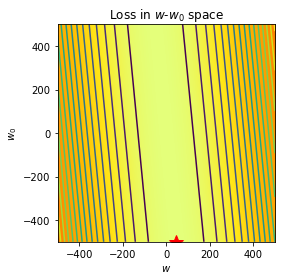

In [53]:
def plot_loss(loss_fun, X, y, steps = []): # reading/understanding this plotting code is optional
    m = 100
    w_lin = np.linspace(-500.0, 500.0, m)
    b_lin = np.linspace(-500.0, 500.0, m)
    w_grid, b_grid = np.meshgrid(w_lin, b_lin)
    w_flat = w_grid.flatten()
    b_flat = b_grid.flatten()
    
    pred = w_flat[None]*X + b_flat[None]

    loss = loss_fun(pred, y) 
    loss_grid = np.reshape(loss,[m,m])

    fig, ax = plt.subplots()
    im = plt.imshow(loss_grid, interpolation='bilinear', origin='lower',
                cmap=cm.Wistia, extent = (-500, 500, -500, 500))
    CS = ax.contour(w_grid, b_grid, loss_grid, 20)
    imin = np.argmin(loss_grid)
    ax.plot(w_flat[imin], b_flat[imin], 'r*', markersize=15)
    plt.xlabel('$w$')
    plt.ylabel('$w_0$')
    #plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Loss in $w$-$w_0$ space')
    ax.set_aspect("equal")
    plt.show()
              
squared_loss_fun = lambda pred, y: np.sum((pred-y[:,None])**2,axis=0)
plot_loss(squared_loss_fun, X, y)

### Visualize the path of $w_0$ and $w$ with full batch gradient descent.

In [54]:
dLdw_list

array([ 1632.67520643, -1377.31783023,  1054.13658624,  -905.84827642,
         678.05127376,   553.88504011,   626.75639619,   485.71473788,
         437.29146547,   212.91664727,    14.49567819,  -159.93622819,
        -282.64816285,  -352.11992506,  -355.16615796,  -305.13031569,
        -218.21544613,  -114.03145376,   -11.42437427,    73.02749863])

w = -49.602775
β = 482.378460


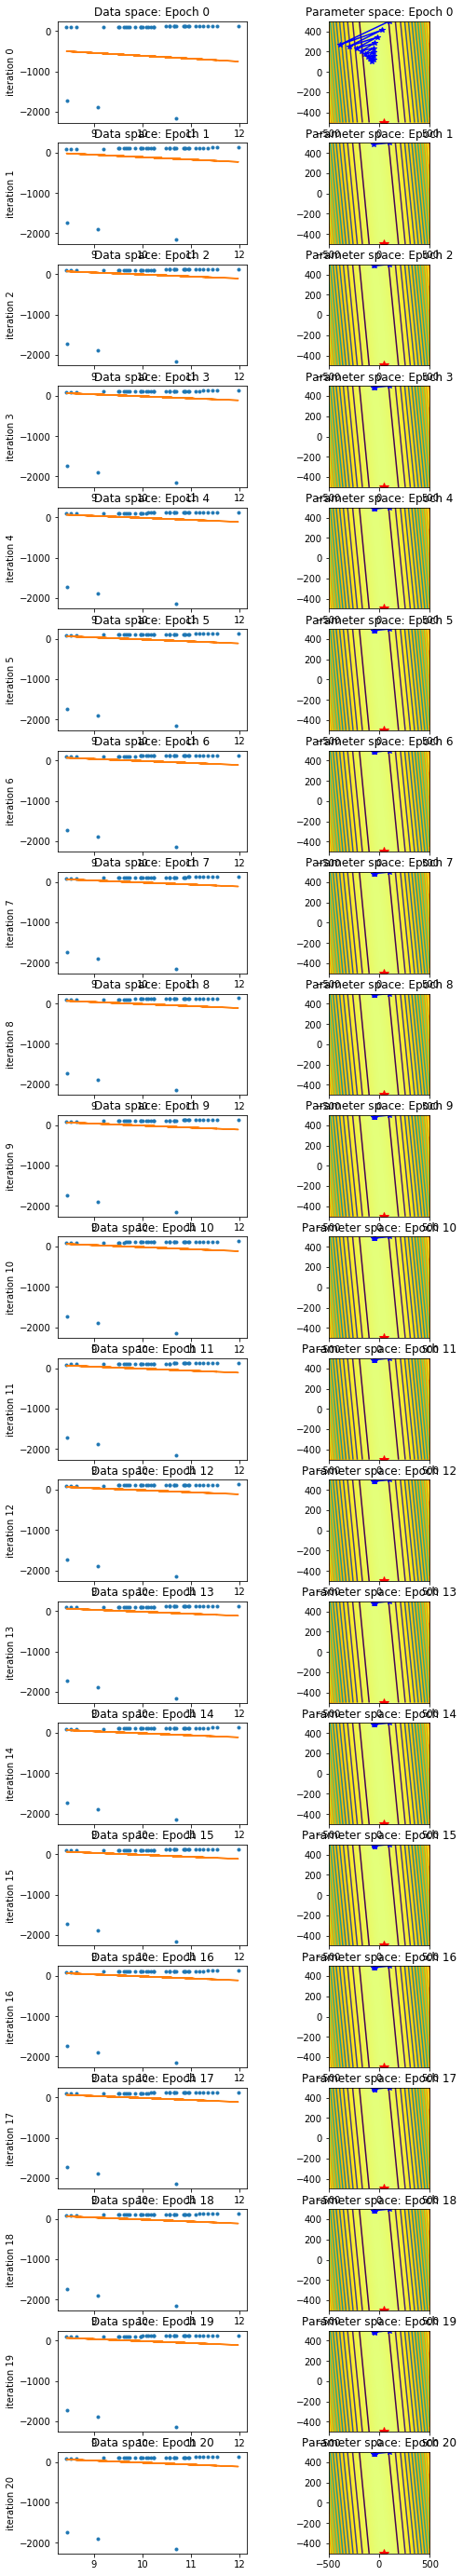

In [57]:
w = 100
β = 500
α = 0.01
Nsteps = 20

def make_plot_pairs(w,β,t,titles=False,figheight=50): 
    plt.subplot(Nsteps+1,2,2*t+1)    
    plt.plot(x,y,'.')
    plt.plot(x,w[-1]*x+β[-1])
    plt.ylabel('iteration %d' % t)
    if titles:
        plt.title("Data space: Epoch %d"%t)
    
    plt.subplot(Nsteps+1,2,2*t+2)
    fig = plt.gcf()
    fig.set_figheight(figheight)
    m = 100
    w_lin = np.linspace(-500.0, 500.0, m)
    β_lin = np.linspace(-500.0, 500.0, m)
    w_grid, β_grid = np.meshgrid(w_lin, β_lin)
    w_flat = w_grid.flatten()
    β_flat = β_grid.flatten()
    pred = w_flat[None]*X + β_flat[None]
    loss = squared_loss_fun(pred, y) 
    loss_grid = np.reshape(loss,[m,m])
    imin = np.argmin(loss_grid)
    plt.plot(w_flat[imin], β_flat[imin], 'r*', markersize=10)
    im = plt.imshow(loss_grid, interpolation='bilinear', origin='lower',
                cmap=cm.Wistia, extent = (-500, 500, -500, 500))
    CS = plt.contour(w_grid, β_grid, loss_grid,15)
    plt.plot(w, β, 'b-*', markersize=6)
    #plt.clabel(CS, inline=1, fontsize=10)
    if titles:
        plt.title("Parameter space: Epoch %d"%t)

        
w_list2=[w]
β_list2=[β]

dLdw_list = np.array([])
dLdβ_list = np.array([])
M_decay = np.array([1, 0.8, 0.6,0.4,0.2])
M_decay = M_decay/np.sum(M_decay)
        
plt.figure(figsize=(8, 20))
make_plot_pairs(w_list,β_list,0,True)


for t in range(Nsteps):
    dLdw = np.mean(x*(w*x+β-y))
    dLdβ = np.mean(w*x+β-y)
    
    dLdw_list = np.append(dLdw_list, dLdw)
    dLdβ_list = np.append(dLdβ_list, dLdβ)
    
    if len(dLdw_list) < 1000:
        w -= α*dLdw
        β -= α*dLdβ
    else:
        w -= α*np.mean(dLdw_list[-5:]*M_decay)
        β -= α*np.mean(dLdβ_list[-5:]*M_decay)
    
    w_list2.append(w)
    β_list2.append(β)
    
    make_plot_pairs(w_list2,β_list2,t+1, titles = True)

    
print("w = %f" % w)
print("β = %f" % β)

### Visualize the path of $w_0$ and $w$ with stochastic gradient descent.

w = 10.997941
β = -1.004181


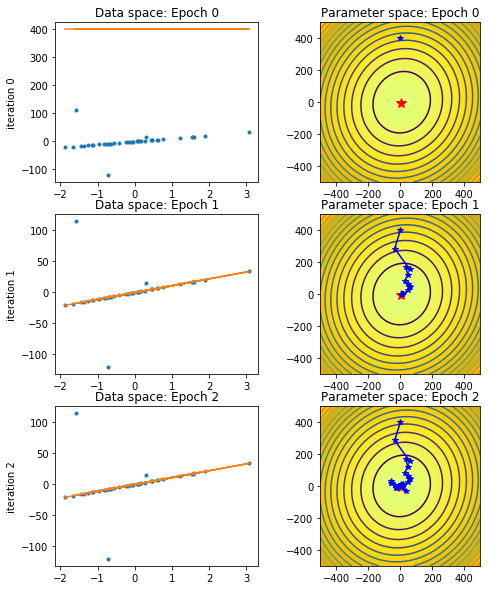

In [18]:
w = 0
β = 400
α = 0.3
Nsteps = 2

squared_loss_fun = lambda pred, y: np.sum((pred-y[:,None])**2,axis=0)

w_list=[w]
β_list=[β]
        
plt.figure(figsize=(8, 20))
make_plot_pairs(w_list,β_list,0,True)


for t in range(Nsteps):
    for i in range(len(X)):
        index = i # np.random.randint(len(X))
        dLdw = x[index]*(w*x[index]+β-y[index])
        dLdβ = w*x[index]+β-y[index]
        w -= α*dLdw
        β -= α*dLdβ
    
        w_list.append(w)
        β_list.append(β)
    
    make_plot_pairs(w_list,β_list,t+1, figheight=10, titles=True)

    
print("w = %f" % w)
print("β = %f" % β)

### The case for robust linear regression

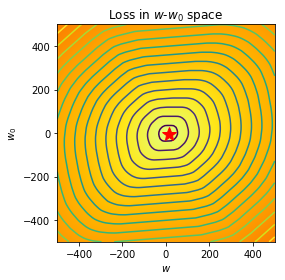

In [8]:
abs_loss_fun = lambda pred, y: np.mean(np.abs(pred-y[:,None]),axis=0)

plot_loss(abs_loss_fun, X, y)

### Full gradient descent

w = 10.738348
β = -0.664885


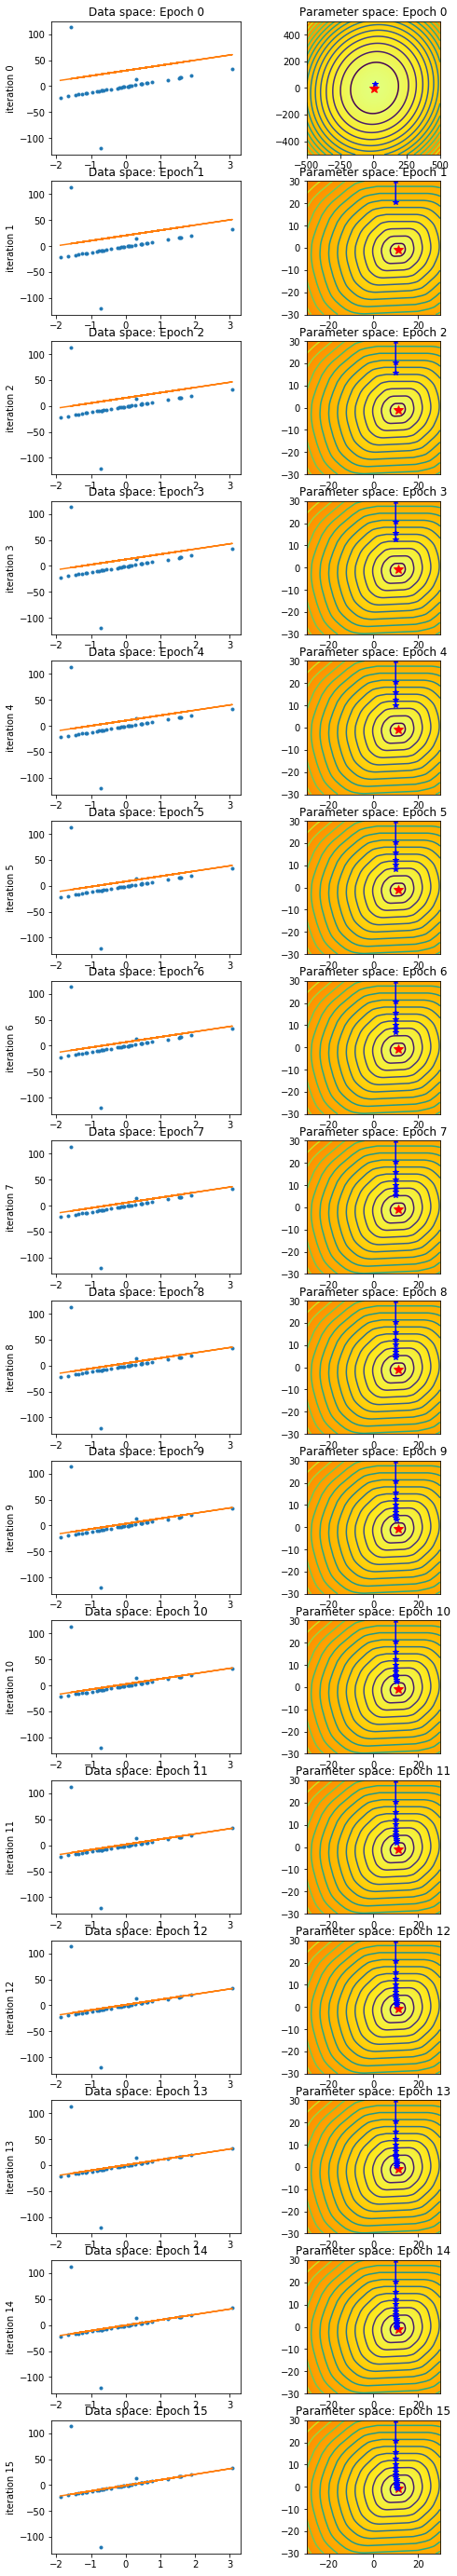

In [9]:
w = 10
β = 30
α = 10
Nsteps = 15

def make_plot_pairs_robust(w,β,t,titles=False,figheight=50): 
    plt.subplot(Nsteps+1,2,2*t+1)    
    plt.plot(X,y,'.')
    plt.plot(X,w[-1]*x+β[-1])
    plt.ylabel('iteration %d' % t)
    if titles:
        plt.title("Data space: Epoch %d" %t)
    
    plt.subplot(Nsteps+1,2,2*t+2)
    fig = plt.gcf()
    fig.set_figheight(figheight)
    m = 100
    w_lin = np.linspace(-30.0, 30.0, m)
    β_lin = np.linspace(-30.0, 30.0, m)
    w_grid, β_grid = np.meshgrid(w_lin, β_lin)
    w_flat = w_grid.flatten()
    β_flat = β_grid.flatten()
    pred = w_flat[None]*X + β_flat[None]
    loss = abs_loss_fun(pred, y) 
    loss_grid = np.reshape(loss,[m,m])
    imin = np.argmin(loss_grid)
    plt.plot(w_flat[imin], β_flat[imin], 'r*', markersize=10)
    im = plt.imshow(loss_grid, interpolation='bilinear', origin='lower',
                cmap=cm.Wistia, extent = (-30, 30, -30, 30))
    CS = plt.contour(w_grid, β_grid, loss_grid,15)
    plt.plot(w, β, 'b-*', markersize=6)
    #plt.clabel(CS, inline=1, fontsize=10)
    if titles:
        plt.title("Parameter space: Epoch %d" %t)

        
w_list=[w]
β_list=[β]
        
plt.figure(figsize=(8, 20))
make_plot_pairs(w_list,β_list,0,True)


for t in range(Nsteps):
    dLdw = np.mean(x*np.sign(w*x+β-y))
    dLdβ = np.mean(np.sign(w*x+β-y))
    w -= (α/(t+1))*dLdw 
    β -= (α/(t+1))*dLdβ 
    
    w_list.append(w)
    β_list.append(β)
    
    make_plot_pairs_robust(w_list,β_list,t+1, titles=True)

    
print("w = %f" % w)
print("β = %f" % β)

### Sochastic gradient descent

w = 10.221521
β = -1.200000


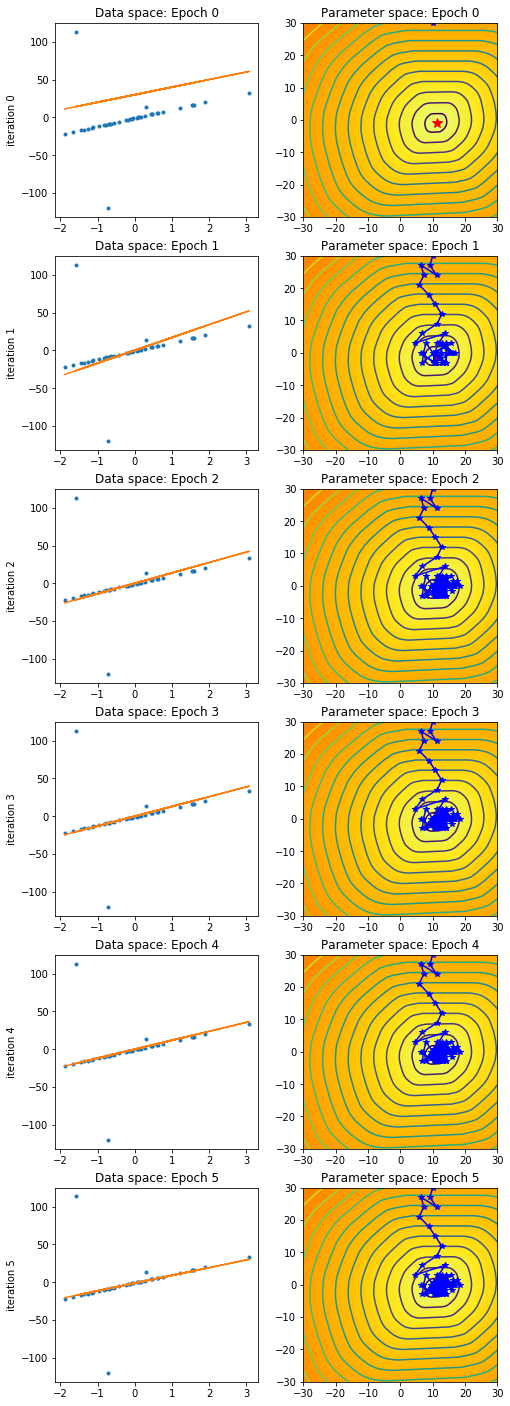

In [11]:
w = 10
β = 30
α = 3
Nsteps = 5
        
w_list=[w]
β_list=[β]
        
plt.figure(figsize=(8, 20))
make_plot_pairs_robust(w_list,β_list,0,True)


for t in range(Nsteps):
    for index in range(len(X)):
        dLdw = x[index]*np.sign(w*x[index]+β-y[index])
        dLdβ = np.sign(w*x[index]+β-y[index])
        w -= (α/(t+1))*dLdw 
        β -= (α/(t+1))*dLdβ 
    
        w_list.append(w)
        β_list.append(β)
    
    make_plot_pairs_robust(w_list,β_list,t+1, figheight=25, titles=True)

    
print("w = %f" % w)
print("β = %f" % β)